In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('credit_card.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory Data Analysis

In [6]:
# Check null values
df.isnull().values.any()

False

In [7]:
# Check duplicate values
df[df.duplicated()].shape


(1081, 31)

In [8]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [9]:
# Column 'Time' does not provide any info
df.drop('Time', axis=1, inplace=True)

In [10]:
# Check once more for duplicates
df[df.duplicated()]["Class"].value_counts()

0    8063
Name: Class, dtype: int64

In [11]:
# Drop duplicates in subset 'Class'
df.drop_duplicates(subset=["Class"], keep='last')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [12]:
df.shape

(283726, 30)

In [13]:
df["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [14]:
import matplotlib.pyplot as plt

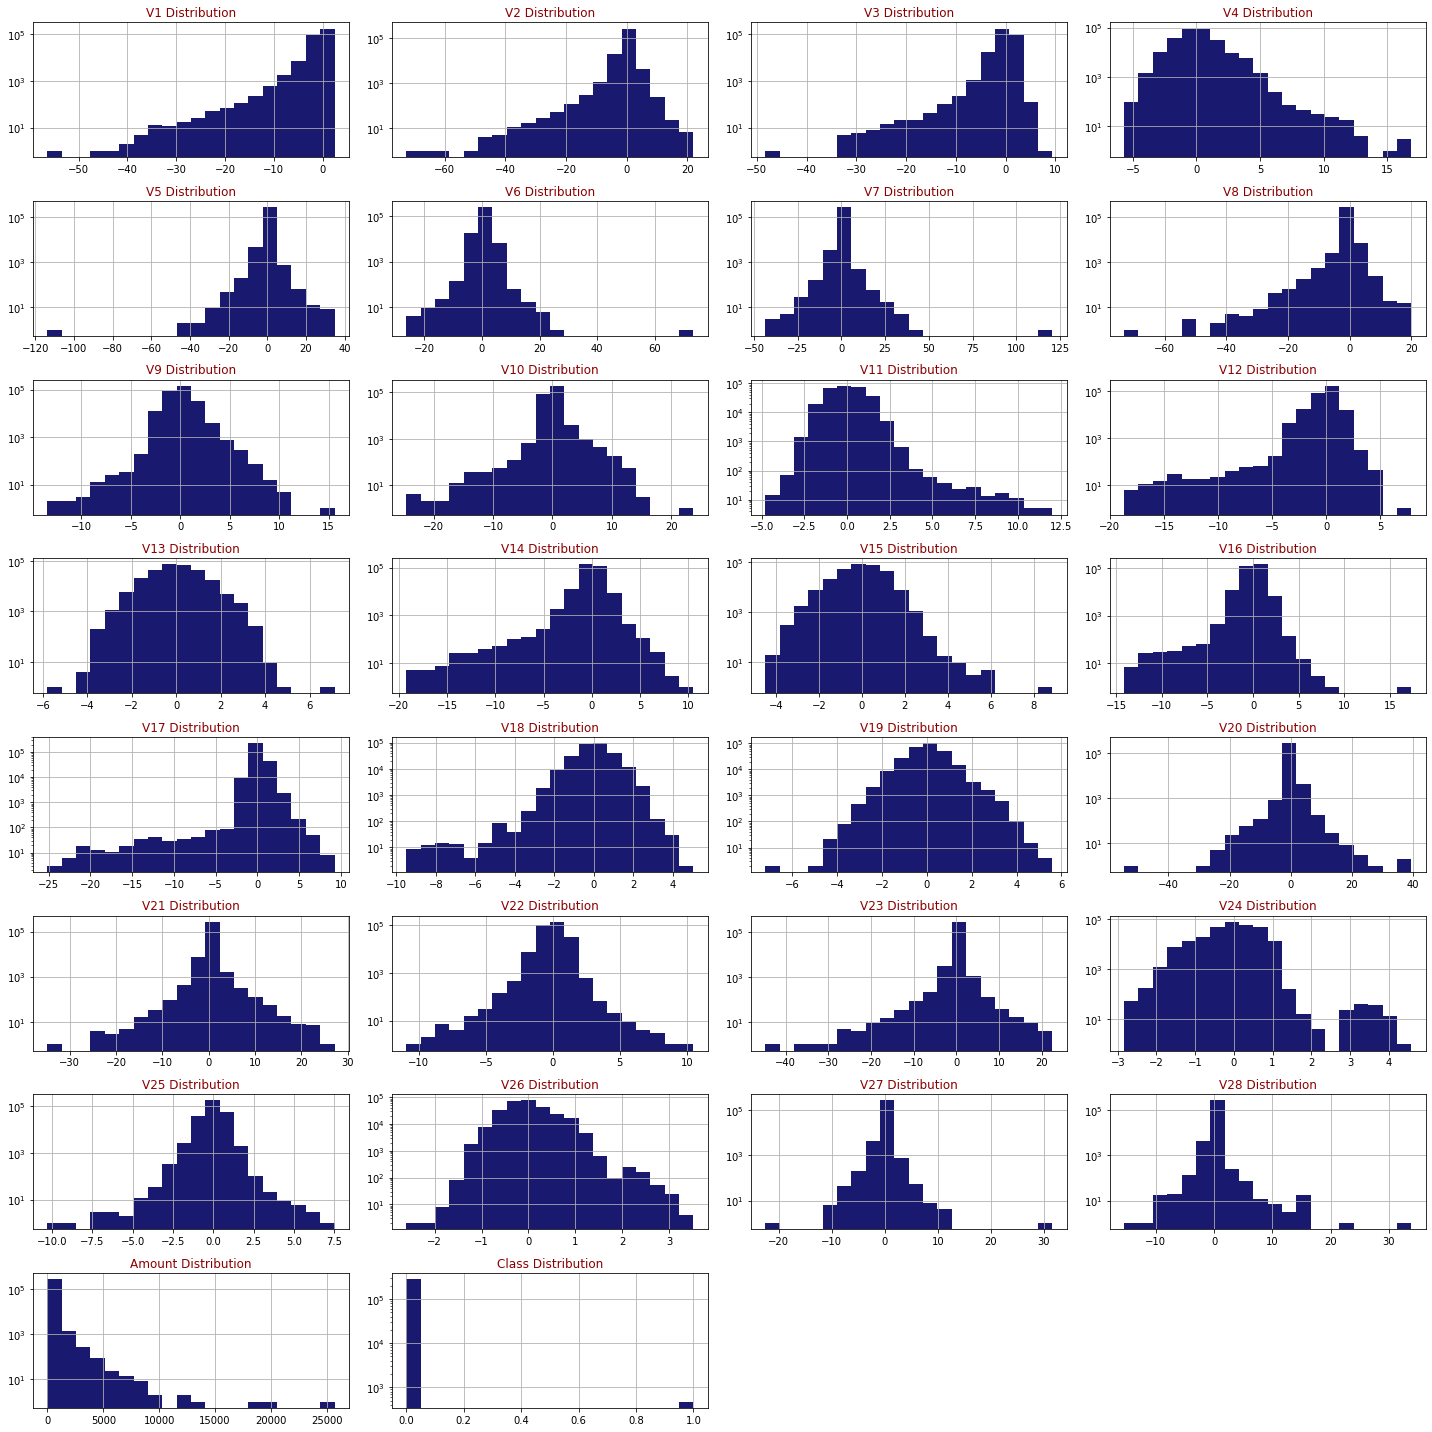

In [15]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor='midnightblue')
        ax.set_title(feature+" Distribution", color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()


draw_histograms(df, df.columns, 8, 4)

In [16]:
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

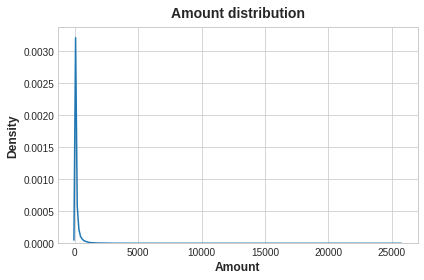

In [17]:
# 'Amount' column analysis
sns.kdeplot(x='Amount', data=df)
plt.title('Amount distribution')
plt.show()

In [18]:
df['Amount'].skew()

16.978803370060476

Skewness value is well over the 0.5 threshold

In [19]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [20]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(
        8, 5), gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title, fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2,
                label='mean=' + str(np.round(df[col].mean(), 1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2,
                label='median=' + str(np.round(df[col].median(), 1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2,
                label='mode=' + str(np.round(df[col].mode()[0], 1)) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17,
               fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [21]:
df['Amount_bc'] = boxcox1p(df['Amount'], boxcox_normmax(df['Amount'] + 1))

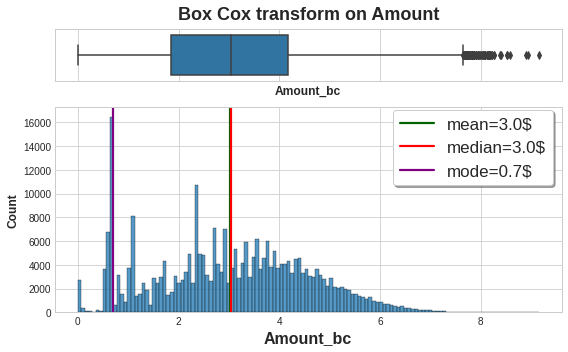

In [22]:
num_plot(df, 'Amount_bc', 'Box Cox transform on Amount', '$')

In [23]:
# Take the log of the 'Amount' column
df['Amount_log'] = np.log(1 + df['Amount'])

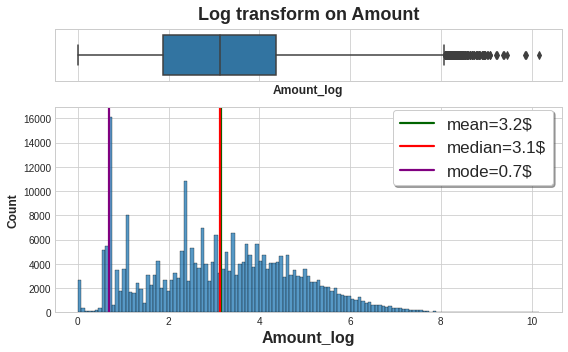

In [24]:
num_plot(df, 'Amount_log', 'Log transform on Amount', '$')

**The distributions are almost identical, therefore we will chose the box-cox transformation.**

In [25]:
df.drop(['Amount', 'Amount_log'], axis=1, inplace=True)

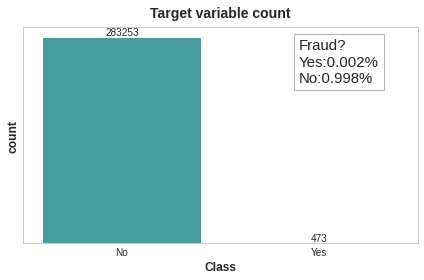

In [26]:
# Fraud column analysis
perc_1 = len(df[df['Class'] == 1])/len(df)
perc_0 = len(df[df['Class'] == 0])/len(df)

labels = ['No', 'Yes']

ax = sns.countplot(x='Class', data=df, palette='mako_r')
ax.bar_label(ax.containers[0])
plt.title('Target variable count')
plt.yticks([])
plt.figtext(.7, .7, "Fraud?\nYes:{:.3f}%\nNo:{:.3f}%".format(perc_1, perc_0), 
                                            bbox={'facecolor': 'white',
                                                'alpha': 0.3, 'pad': 5}, fontsize=15)
plt.xticks(df['Class'].value_counts().index, labels)
plt.show()

In [27]:
# Independent and dependent features
X = df.drop('Class', axis=1)
y = df.Class

## Dimensionality reduction using PCA

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score, accuracy_score, auc

In [30]:
# Scale the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)

array([[ 9.91686910e-01,  1.14471659e-01,  1.22285819e-01, ...,
         4.78660606e-01, -1.74974677e-01, -5.94893138e-01],
       [-1.29613307e+00, -3.12375915e-01,  2.34877846e-01, ...,
        -2.59578242e-01, -1.06422809e-01,  2.97734749e-01],
       [ 2.57495338e+00,  8.60183500e-02, -9.43708657e-05, ...,
         2.46128638e-01,  9.00882418e-02,  2.16590999e-01],
       ...,
       [ 1.90902593e-01, -5.90030665e-01, -7.73984080e-01, ...,
        -2.07946318e-01, -1.39423832e-01, -7.38124913e-01],
       [-2.39204363e-01, -2.69229505e-01, -4.13993876e-01, ...,
        -3.60324101e-01, -2.48510174e-01,  3.90002892e-01],
       [ 1.30760292e+00, -6.13382385e-01,  4.09126105e-01, ...,
         7.98602695e-02, -1.16732790e-01, -5.92524838e-01]])

Now we can obtain cummulative explained variance ratios and number of principal components

In [32]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)*100
comp= [n for n in range(len(cum_sum))]

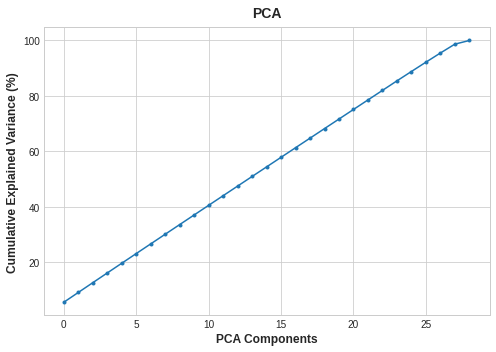

In [33]:
plt.figure(figsize=(7,5))
plt.plot(comp, cum_sum, marker='.')
plt.xlabel('PCA Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA')
plt.show()

Usually we can keep most of the explainability removing more features, however in this dataset the features appears to be already transformed by PCA and so we could potentially just remove 1 feature.
For this reason we won't drop any features and keep the original 28 columns in the X variable.

Moreover, two different techniques will be used to deal with class unbalance: undersampling and oversampling.
There is no specific rule to choose which is the best among the two, for this reason we will try both of them and compare the results.

## Balnace Class by Undersampling

When undersampling, we aim to remove a number of the rows of the majority class (rows where class=0) in order to match the number of rows of the minority class (rows where class=1).

In [38]:
y.value_counts()

0    283253
1       473
Name: Class, dtype: int64

This means that we will remove 283253 - 473 = 282780 rows. Its a very big number of rows. However, undersampling will help a lot the algorithm to understand how to distinguish the two classes.

In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [41]:
rus = RandomUnderSampler(random_state=42)
X_us, y_us = rus.fit_resample(X, y)
y_us.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: Class, dtype: float64

Now the dataset is balanced with respect to the column 'class'.

Now, we can split the dataset in train and test sets

In [42]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size=0.2, stratify = y_us,random_state=42)

Then we apply standardization to the data to improve the neural net learning

In [43]:
scaler = StandardScaler()

X_train_us = scaler.fit_transform(X_train_us)
X_test_us = scaler.transform(X_test_us)

Moreover, we further split the training set into a new train and validation dataset. This is done to monitor a metric ( accuracy or recall for example) on the validation set and so prevent overfitting.

In [44]:
X_train_us, X_val_us, y_train_us, y_val_us = train_test_split(X_train_us, y_train_us, test_size=0.2, shuffle= True)

## Neural Network-Undersampling

The most important metric for this credit card fraud application is recall, since we want few false negatives as possibile: false negatives translate to 'allowed fraudolent transaction', which represent the worst case. On the other hand, false positives are 'not fraudolent' transaction flagged as fraudolent: this is what happen often also in real life, and it does not represent the worst case.

In [45]:
from tensorflow import keras
from tensorflow.keras import layers

In [46]:
#define a quite simple ANN
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(X_train_us.shape[-1],)),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Recall']) #choose recall as the metric


EPOCHS = 100

#setup earlystopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train_us, y_train_us,
    validation_data=(X_val_us, y_val_us),
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=0
)

## Neural Net Prediction-Undersampling

In particular, the output of a ANN is a probability (a number between 0 and 1), so by applying the 'round' method we can obtain either 0 or 1 starting by the probability.

In [47]:
y_pred_prob_us = model.predict(X_test_us)
y_pred_us = y_pred_prob_us.round()

In [48]:
print(classification_report(y_test_us, y_pred_us, target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.90      0.99      0.94        95
         Yes       0.99      0.89      0.94        95

    accuracy                           0.94       190
   macro avg       0.95      0.94      0.94       190
weighted avg       0.95      0.94      0.94       190



The Neural net performed quite well on the undersampled dataset, with performance scores well over 90%

## Balance Class by oversampling with SMOTE

Oversampling will be performed on the dataset.

In [49]:
y.value_counts()

0    283253
1       473
Name: Class, dtype: int64

This means that we will add 283253 - 473 = 282780 rows with class = 1, which is indeed a large number of duplicates that will be added. The neural network could have some troubles learning how to identify a fraudolent transaction with so many duplicates of the same rows.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y,random_state=42)

This is a very important step: we can only apply oversampling on the training set!
Oversampling should only be applied to the training set to help the neural network learn 'more' about the minority class and reduce the bias with respect top the majority class.

In [52]:
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

y_train.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: Class, dtype: float64

We standardize the data to improve the neural network learning.

In [53]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Split the training set in a new training and validation data.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle= True)

## Neural Network-Oversampling

In [55]:
# By performing some tests, we achieve higher scores by making a slighlty more complex neural network (adding more layers and neurons).

model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(X_train.shape[-1],)),
    layers.Dropout(0.5),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Recall'])

EPOCHS = 100
BATCH_SIZE = 1000 #We need to include a batch size now since there are lots of data in the training set

early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=0
)

In [56]:
# Neural Net Oversampling Prediction

y_pred_prob_os = model.predict(X_test)
y_pred_os = y_pred_prob_os.round()

In [57]:
print(classification_report(y_test, y_pred_os.round(), target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     56651
         Yes       0.76      0.80      0.78        95

    accuracy                           1.00     56746
   macro avg       0.88      0.90      0.89     56746
weighted avg       1.00      1.00      1.00     56746



We can clearly see the unbalance in the support: 55k rows with class=0 and just 95 rows with class=1.
Moreover, we can see a remarkable difference between the precision, recall and f1 scores between the two classes: the network learned more how to identify a non-fraudolent transaction (scores of 100%) and less how to indentify a fraudolent transaction (scores around 80%).

## Comapring Results

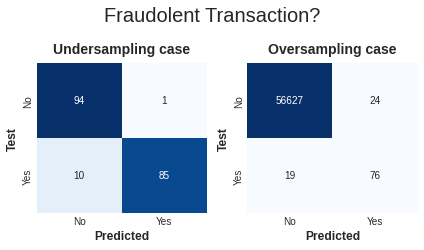

In [58]:
fig, ax = plt.subplots(1,2,figsize=(6,3.5))
labels=['No','Yes']
sns.heatmap(confusion_matrix(y_test_us, y_pred_us), annot=True, cmap="Blues", fmt='g', cbar=False,ax=ax[0])
plt.suptitle('Fraudolent Transaction?', fontsize=20)
ax[0].set_title('Undersampling case')
ax[0].set_yticklabels(labels);
ax[0].set_xticklabels(labels);
ax[0].set_ylabel('Test')
ax[0].set_xlabel('Predicted')


sns.heatmap(confusion_matrix(y_test, y_pred_os), annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[1])
ax[1].set_title('Oversampling case')
ax[1].set_xticklabels(labels);
ax[1].set_yticklabels(labels);
ax[1].set_ylabel('Test')
ax[1].set_xlabel('Predicted')
plt.tight_layout()
plt.show()


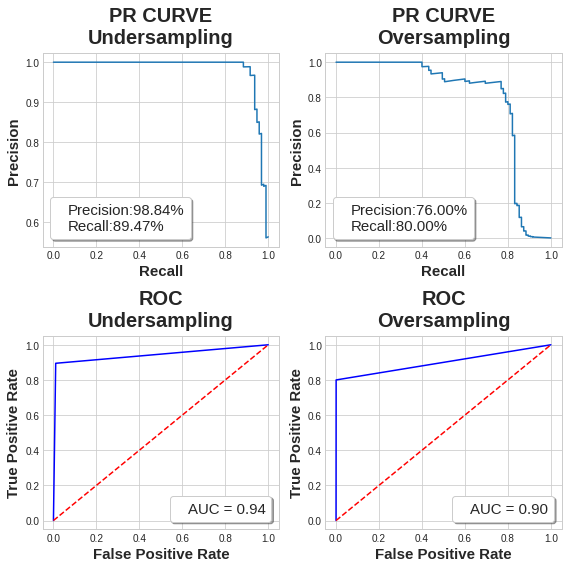

In [59]:
fig, ax = plt.subplots(2,2,figsize=(8,8))
p,r,_ = precision_recall_curve(y_test_us,y_pred_prob_us)
ax[0,0].plot(r,p, label = "Precision:{:.2f}%\nRecall:{:.2f}%".format(precision_score(y_test_us, y_pred_us)*100,recall_score(y_test_us, y_pred_us)*100))
ax[0,0].set_title('PR CURVE\nUndersampling',fontsize=20)
ax[0,0].set_ylabel('Precision',fontsize=15)
ax[0,0].set_xlabel('Recall',fontsize=15)
ax[0,0].legend(loc = 'lower left', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)

p,r,_ = precision_recall_curve(y_test,y_pred_prob_os)
ax[0,1].plot(r,p, label = "Precision:{:.2f}%\nRecall:{:.2f}%".format(precision_score(y_test, y_pred_os)*100,recall_score(y_test, y_pred_os)*100))
ax[0,1].set_title('PR CURVE\nOversampling',fontsize=20)
ax[0,1].set_ylabel('Precision',fontsize=15)
ax[0,1].set_xlabel('Recall',fontsize=15)
ax[0,1].legend(loc = 'lower left', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)



fprcat, tprcat, _ = roc_curve(y_test_us, y_pred_us)
roc_auccat = auc(fprcat, tprcat)

ax[1,0].plot(fprcat, tprcat, 'b', label = 'AUC = %0.2f' % roc_auccat)
ax[1,0].plot([0, 1], [0, 1],'r--')
ax[1,0].set_title('ROC\nUndersampling',fontsize=20)
ax[1,0].set_ylabel('True Positive Rate',fontsize=15)
ax[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax[1,0].legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)



fprcat, tprcat, _ = roc_curve(y_test, y_pred_os)
roc_auccat = auc(fprcat, tprcat)
ax[1,1].plot(fprcat, tprcat, 'b', label = 'AUC = %0.2f' % roc_auccat)
ax[1,1].plot([0, 1], [0, 1],'r--')
ax[1,1].set_title('ROC\nOversampling',fontsize=20)
ax[1,1].set_ylabel('True Positive Rate',fontsize=15)
ax[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax[1,1].legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)


plt.tight_layout()
plt.show()

By performing undersampling we can achieve higher scores compared to the oversampling case. This is due to the extreme unbalance between the two classes, and so even if we create so many duplicates of the minority class (more than 280'000), the network can not properly learn the patterns inside the data. This is why it is important to collect good data, without having such a big unbalance.